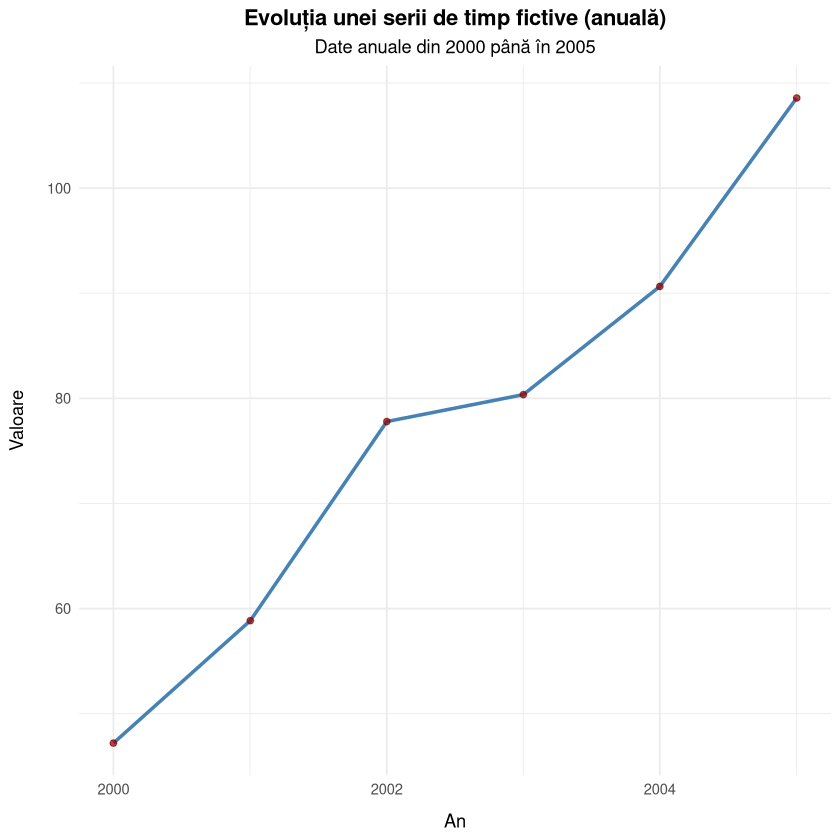

In [3]:
# Încărcăm pachetele necesare
library(ggplot2)
library(lubridate)
library(dplyr)

# 1. Creăm un set de date fictiv de tip serie de timp anuală
start_year <- ymd("2000-01-01") # Data de start: 1 ianuarie 2000
end_year <- ymd("2005-01-01")   # Data de sfârșit: 1 ianuarie 2005 (inclusiv 2000, 2001, 2002, 2003, 2004)

# Generăm o secvență de date, câte una pentru fiecare an
dates <- seq(from = start_year, to = end_year, by = "year")

# Valori cu o tendință generală de creștere și un pic de zgomot
set.seed(123) # Pentru reproductibilitate
# Ajustăm numărul de valori la numărul de ani
num_years <- length(dates)
values <- 50 + (0:(num_years - 1)) * 10 + rnorm(num_years, sd = 5) # Creștere mai pronunțată pentru ani

# Creăm un data frame
time_series_data <- data.frame(
  Date = dates,
  Value = values
)

# 2. Vizualizăm seria de timp ca un grafic de tip linie
ggplot(time_series_data, aes(x = Date, y = Value)) +
  geom_line(color = "steelblue", linewidth = 1) + # Folosim 'linewidth' conform recomandării
  geom_point(color = "darkred", size = 1.5, alpha = 0.7) +
  labs(
    title = "Evoluția unei serii de timp fictive (anuală)",
    subtitle = paste0("Date anuale din ", year(start_year), " până în ", year(end_year)),
    x = "An",
    y = "Valoare"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)))

Primele 5 rânduri din setul de date:
# A tibble: 6 × 3
  student_id ore_studiu scor_examen
       <int>      <dbl>       <dbl>
1          1       46.6       100  
2          2       47.5       100  
3          3       21.4        94.8
4          4       43.2       100  
5          5       35.7       100  
6          6       30.8        98.4

Sumarul statistic al datelor:
   student_id       ore_studiu     scor_examen    
 Min.   :  1.00   Min.   :10.01   Min.   : 55.63  
 1st Qu.: 25.75   1st Qu.:20.39   1st Qu.: 80.45  
 Median : 50.50   Median :31.59   Median : 95.33  
 Mean   : 50.50   Mean   :30.98   Mean   : 89.34  
 3rd Qu.: 75.25   3rd Qu.:40.54   3rd Qu.:100.00  
 Max.   :100.00   Max.   :49.56   Max.   :100.00  



`geom_smooth()` using formula = 'y ~ x'



Rezumatul modelului de regresie liniară:

Call:
lm(formula = scor_examen ~ ore_studiu, data = data_examen)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3880  -3.9528  -0.4736   3.5733  15.0873 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 59.87143    1.78196   33.60   <2e-16 ***
ore_studiu   0.95113    0.05363   17.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.445 on 98 degrees of freedom
Multiple R-squared:  0.7625,	Adjusted R-squared:   0.76 
F-statistic: 314.6 on 1 and 98 DF,  p-value: < 2.2e-16


Coeficienții modelului (folosind broom::tidy):
# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   59.9      1.78        33.6 1.39e-55
2 ore_studiu     0.951    0.0536      17.7 2.37e-32

Rezultate R-squared și F-statistic (folosind broom::glance):
# A tibble: 1 × 12
  r.squared adj.r.squa

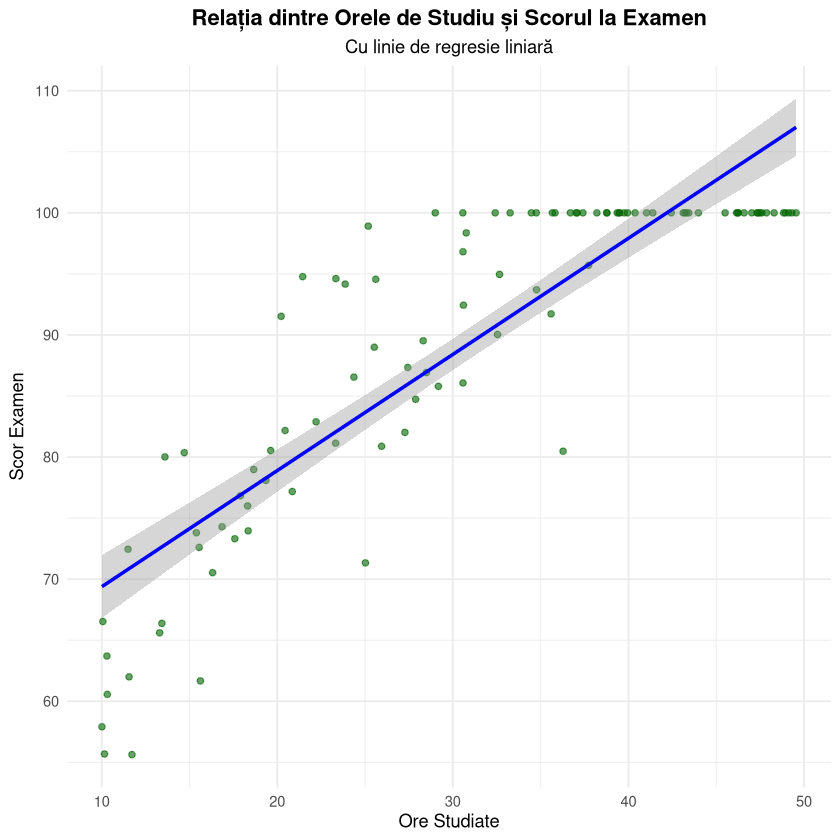

In [4]:
# Încărcăm pachetele necesare
# Asigură-te că aceste pachete sunt instalate.
# Dacă nu sunt, le poți instala cu install.packages(c("dplyr", "ggplot2", "broom"))
library(dplyr)
library(ggplot2)
library(broom) # Pentru a extrage rezultatele regresiei într-un format tidy

# 1. Generarea datelor fictive
set.seed(42) # Pentru reproductibilitate
num_students <- 100

data_examen <- tibble(
  student_id = 1:num_students,
  ore_studiu = runif(num_students, min = 10, max = 50), # Ore studiate între 10 și 50
  scor_examen = 50 + (ore_studiu * 1.5) + rnorm(num_students, mean = 0, sd = 8) # Scorul cu zgomot
)

# Asigurăm că scorul nu depășește 100
data_examen <- data_examen %>%
  mutate(scor_examen = pmin(scor_examen, 100))

cat("Primele 5 rânduri din setul de date:\n")
print(head(data_examen))
cat("\n")

# 2. Analiză Exploratorie: Sumar statistic și Vizualizare
cat("Sumarul statistic al datelor:\n")
print(summary(data_examen))
cat("\n")

# Vizualizare: Scatter plot cu regresie liniară
plot_data <- ggplot(data_examen, aes(x = ore_studiu, y = scor_examen)) +
  geom_point(alpha = 0.6, color = "darkgreen") + # Puncte pentru fiecare student
  geom_smooth(method = "lm", se = TRUE, color = "blue", linewidth = 1) + # Linie de regresie liniară
  labs(
    title = "Relația dintre Orele de Studiu și Scorul la Examen",
    subtitle = "Cu linie de regresie liniară",
    x = "Ore Studiate",
    y = "Scor Examen"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

print(plot_data)
cat("\n")

# 3. Modelare Statistică: Regresie Liniară
model_regresie <- lm(scor_examen ~ ore_studiu, data = data_examen)

cat("Rezumatul modelului de regresie liniară:\n")
print(summary(model_regresie))
cat("\n")

# Utilizarea pachetului 'broom' pentru a extrage rezultatele "tidy"
cat("Coeficienții modelului (folosind broom::tidy):\n")
print(tidy(model_regresie))
cat("\n")

cat("Rezultate R-squared și F-statistic (folosind broom::glance):\n")
print(glance(model_regresie))
cat("\n")

# O scurtă interpretare a coeficientului
coef_ore_studiu <- tidy(model_regresie) %>%
  filter(term == "ore_studiu") %>%
  pull(estimate)

cat(sprintf("Pentru fiecare oră suplimentară de studiu, scorul la examen este prezis să crească cu aproximativ %.2f puncte.\n", coef_ore_studiu))

Pachete încărcate. Inițiere simulare Monte Carlo și modelare Bayesiană.

Configurare paralelism cu 11 nuclee.

Efectuare simulări Monte Carlo (aceasta poate dura puțin)...
Simulări Monte Carlo finalizate. Primele rânduri:
# A tibble: 6 × 4
  sim_id true_proportion observed_successes sample_size
   <int>           <dbl>              <int>       <dbl>
1      1           0.458                 17          30
2      2           0.448                  9          30
3      3           0.371                 13          30
4      4           0.658                 20          30
5      5           0.643                 18          30
6      6           0.743                 23          30


Construirea și rularea modelului Bayesian cu brms (aceasta va dura cel mai mult)...


Start sampling



Running MCMC with 4 chains, at most 11 in parallel...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling)

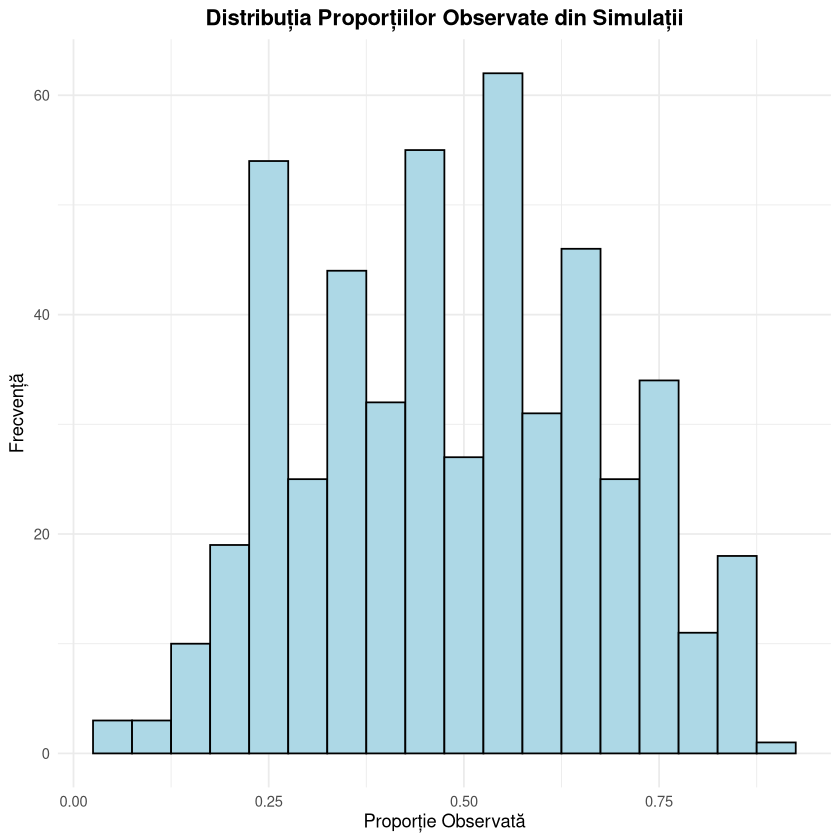

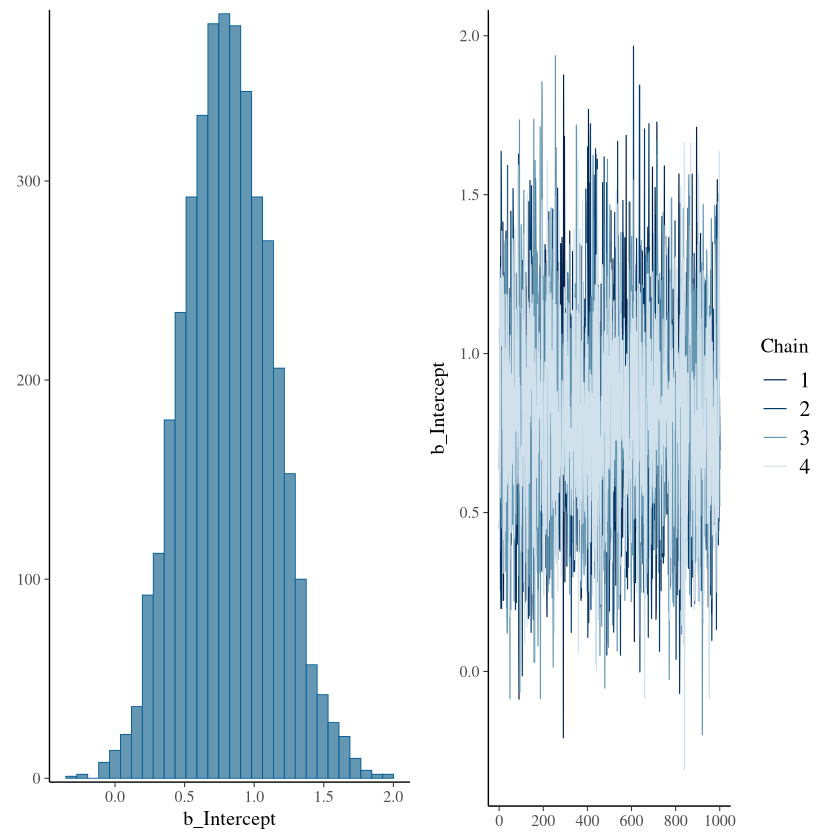

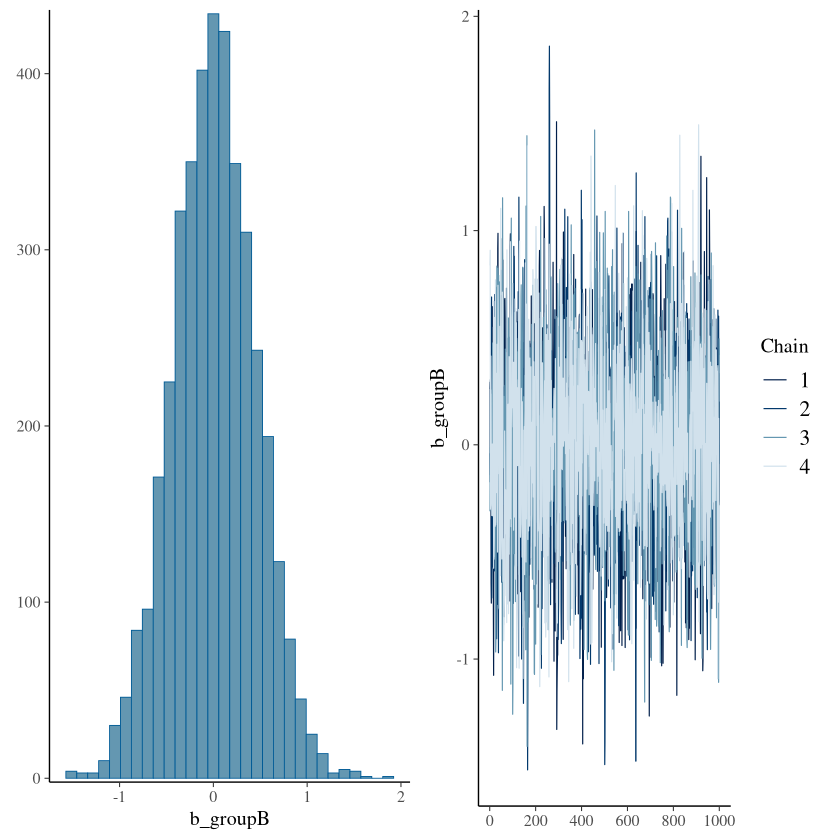

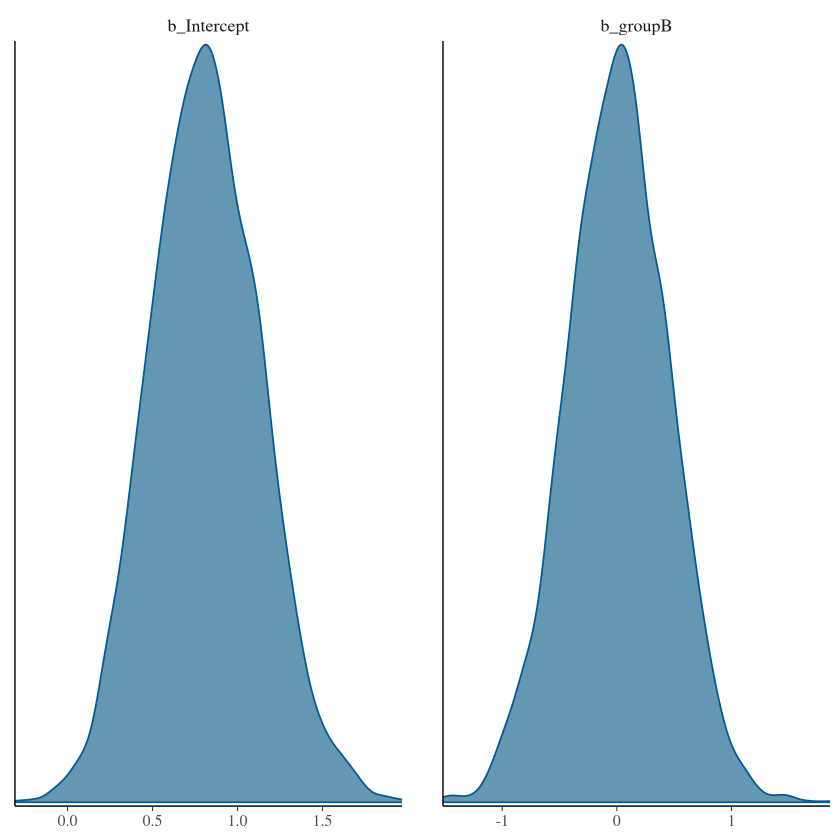


Execuție completă a celulei intensive. Verificați output-ul și graficele.


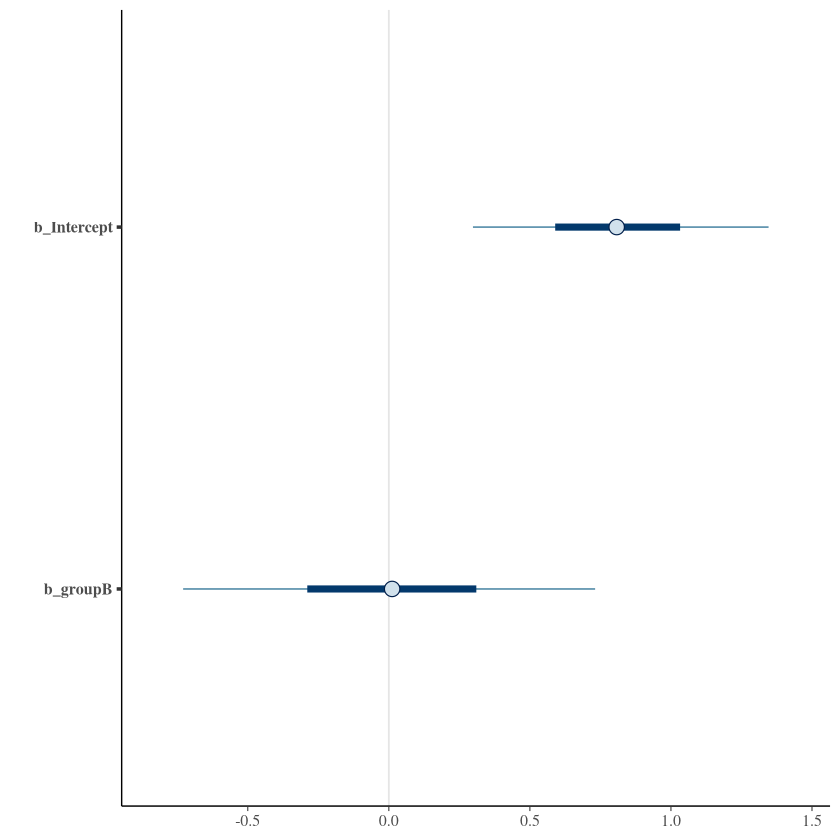

In [4]:
# Încărcăm pachetele necesare
library(dplyr)    # Manipulare date
library(ggplot2)  # Vizualizare
library(purrr)    # Iterare funcțională
library(furrr)    # Iterare paralelă (necesită plan(multisession) sau similar)
library(brms)     # Modelare bayesiană
library(posterior) # Post-procesare rezultate bayesiene
library(bayesplot) # Vizualizări bayesiene

cat("Pachete încărcate. Inițiere simulare Monte Carlo și modelare Bayesiană.\n\n")

# 0. Configurare paralelism pentru furrr (pentru a accelera simulările)
# Utilizează toate nucleele disponibile minus unul, pentru a nu bloca sistemul
num_cores <- parallel::detectCores() - 1
if (num_cores < 1) num_cores <- 1 # Asigură-te că ai cel puțin un nucleu
plan(multisession, workers = num_cores) # Setează strategia de paralelism

cat(sprintf("Configurare paralelism cu %d nuclee.\n\n", num_cores))

# 1. Simularea Monte Carlo: Generăm multiple seturi de date mici
set.seed(1234) # Seed general pentru reproductibilitate
num_simulations <- 500 # Numărul de "experimente" simulate
sample_size_per_sim <- 30 # Dimensiunea eșantionului per experiment

# Definim o funcție pentru a simula un singur experiment
simulate_experiment <- function(id) {
  # Simulăm o proporție adevărată (p) și date binare (succese/eșecuri)
  true_p <- runif(1, 0.2, 0.8) # Proporția reală variază între 20% și 80%
  data <- rbinom(sample_size_per_sim, size = 1, prob = true_p)
  
  tibble(
    sim_id = id,
    true_proportion = true_p,
    observed_successes = sum(data),
    sample_size = sample_size_per_sim
  )
}

cat("Efectuare simulări Monte Carlo (aceasta poate dura puțin)...\n")
# Rulăm simulările în paralel folosind future_map_dfr
# Adăugăm .options = furrr_options(seed = TRUE) pentru a gestiona corect semințele aleatoare în paralel
simulated_data <- future_map_dfr(1:num_simulations, simulate_experiment, .options = furrr_options(seed = TRUE))

cat("Simulări Monte Carlo finalizate. Primele rânduri:\n")
print(head(simulated_data))
cat("\n")

# 2. Vizualizarea distribuției proporțiilor observate
plot_sim <- ggplot(simulated_data, aes(x = observed_successes / sample_size)) +
  geom_histogram(binwidth = 0.05, fill = "lightblue", color = "black") +
  labs(
    title = "Distribuția Proporțiilor Observate din Simulații",
    x = "Proporție Observată",
    y = "Frecvență"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

print(plot_sim)
cat("\n")

# 3. Modelare Bayesiană (mai intensivă computațional): Estimarea unei proporții generale
# Să presupunem că avem un studiu cu 100 de observații binare.
model_data <- data.frame(
  outcome = rbinom(100, size = 1, prob = 0.6), # 100 de observații, proporție reală 0.6
  group = sample(c("A", "B"), 100, replace = TRUE) # Un factor de grupare
)

cat("Construirea și rularea modelului Bayesian cu brms (aceasta va dura cel mai mult)...\n")
# Definirea și rularea modelului bayesian
brm_model <- brm(
  outcome ~ group,
  data = model_data,
  family = bernoulli(link = "logit"), # Pentru rezultate binare
  chains = 4, # Numărul de lanțuri MCMC (mai multe lanțuri pentru robustețe)
  iter = 2000, # Numărul de iterații per lanț (jumătate warm-up, jumătate sampling)
  warmup = 1000, # Iterații de warm-up (ardere)
  cores = num_cores, # Folosim paralelism dacă e disponibil
  backend = "cmdstanr", # Recomandat pentru performanță
  seed = 5678, # Seed pentru model
  control = list(adapt_delta = 0.95) # Parametru de control pentru sampling (poate ajuta cu avertismentele)
)

cat("Modelul Bayesian a fost rulat cu succes. Rezumatul:\n")
print(summary(brm_model))
cat("\n")

# 4. Vizualizarea rezultatelor modelului Bayesian
cat("Vizualizarea rezultatelor modelului Bayesian...\n")

# Ploturi de diagnostic (trace plots)
# Folosim 'nvariables' în loc de 'N' pentru a evita avertismentul
plot(brm_model, nvariables = 1, ask = FALSE)

# Ploturi de densitate ale posteriori (pentru parametri)
# Am eliminat 'prob_outer' aici, lăsând bayesplot să folosească setările implicite pentru intervale.
# Acestea vor fi de obicei intervalul median și 90% sau 95% CI.
mcmc_plot(brm_model, type = "dens")
mcmc_plot(brm_model, type = "intervals") 

cat("\nExecuție completă a celulei intensive. Verificați output-ul și graficele.\n")

# Oprește paralelismul pentru a elibera resursele
plan(sequential)